<a href="https://colab.research.google.com/github/Ruthra333/capstone-projects/blob/main/Project_Proposal_for_COVID19_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TITLE : COVID-19  PREDICTION**

## **Introduction:**
In the wake of the COVID-19 pandemic, accurate and swift diagnosis plays a crucial role in effective healthcare management. This project leverages EDA &
machine learning techniques to predict COVID-19 diagnoses based on symptoms and patient information. By analyzing a dataset containing information from individuals who underwent RT-PCR testing, the project aims to identify patterns that contribute to accurate predictions. The end goal is to create a model that can aid medical professionals in identifying potential COVID-19 cases efficiently.

## **Key Objectives:**

Develop a machine learning model to predict COVID-19 diagnoses.
Explore the relationships between symptoms, age, sex, and COVID-19 outcomes.
Provide insights for effective screening and diagnosis based on data patterns.
Evaluate and compare the performance of different machine learning models.
Utilize SQL queries to extract meaningful information from the dataset.

## **Expected Impact:**

Improved accuracy in predicting COVID-19 diagnoses.
Efficient allocation of healthcare resources through targeted screening.
Enhanced understanding of the relationship between symptoms and disease outcomes.
A potential template for predicting other infectious diseases in the future.
This project is designed to contribute to the ongoing efforts in managing and mitigating the impact of infectious diseases, with a focus on leveraging machine learning for more accurate and timely diagnoses.

## **why this proposal ?**


 1. Accurate prediction can significantly improve medical treatment and **screening efficiency**.

2. **Reducing the healthcare burden** by identifying potential COVID-19 cases promptly.

## **Impact of effective screening and reducing health care burden :**

1. Early identification allows for timely and appropriate medical intervention.

2. Prevents the spread of the disease and optimizes resource allocation.

3. Efficient screening reduces the load on healthcare systems.

4. Enables targeted testing and resource allocation.

## **how my proposed method can be helpful for future diseases?**

1. The model can serve as a template for predicting other infectious diseases.

2. Enhances our understanding of the relationship between symptoms and disease outcomes.

## **Hypothesis:**

  Certain symptoms (cough, fever, shortness of breath) will strongly correlate with a positive COVID-19 diagnosis.

## **Exploratory data analytics**

### **Data importing ⏬**

In [3]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
# loading the dataset
df=pd.read_csv("/content/corona_tested_006.csv")

<ipython-input-4-0768bf204935>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/corona_tested_006.csv")


### **Data pre-processing & exploration 🔍**

In [5]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [6]:
df.info()  # we can see that except ind_id column all are object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [7]:
# converting the datatype as categorical

for i in df.columns:
    if i=='Ind_ID' or i == 'Test_date':
        pass
    else:
        df[i] = df[i].astype('category')

In [8]:
df.describe(include='O') # we can see columns with unique values

,Test_date
count,278848
unique,51
top,20-04-2020
freq,10921


In [9]:
df['Corona'].value_counts() #checking the unique values

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [10]:
# standardizing the representation of boolean values in a column

def convert(x):
    if x=='TRUE' or x==True:
        return 'true'
    elif x=='FALSE' or x==False:
        return 'false'
    else:
        return x

In [11]:
# modifying it in the dataframe
df['Cough_symptoms'] = df['Cough_symptoms'].map(convert)
df['Fever'] = df['Fever'].map(convert)
df['Sore_throat'] = df['Sore_throat'].map(convert)
df['Shortness_of_breath'] = df['Shortness_of_breath'].map(convert)
df['Headache'] = df['Headache'].map(convert)

In [12]:
# replacing the none values with Nan values to get it as null values

df.replace({'None': np.nan,'other': np.nan}, inplace=True)

In [13]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [14]:
# dropping null values
df.dropna(subset=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Corona'],axis=0,inplace=True)

In [15]:
# # dropping the age_60_above column as more than of data is missing and it may lead to bias
df.drop('Age_60_above',axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  int64   
 1   Test_date            274702 non-null  object  
 2   Cough_symptoms       274702 non-null  object  
 3   Fever                274702 non-null  object  
 4   Sore_throat          274702 non-null  object  
 5   Shortness_of_breath  274702 non-null  object  
 6   Headache             274702 non-null  object  
 7   Corona               274702 non-null  category
 8   Sex                  255668 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(3), int64(1), object(6)
memory usage: 17.6+ MB


### **Explorartory Data Analysis ⚛**


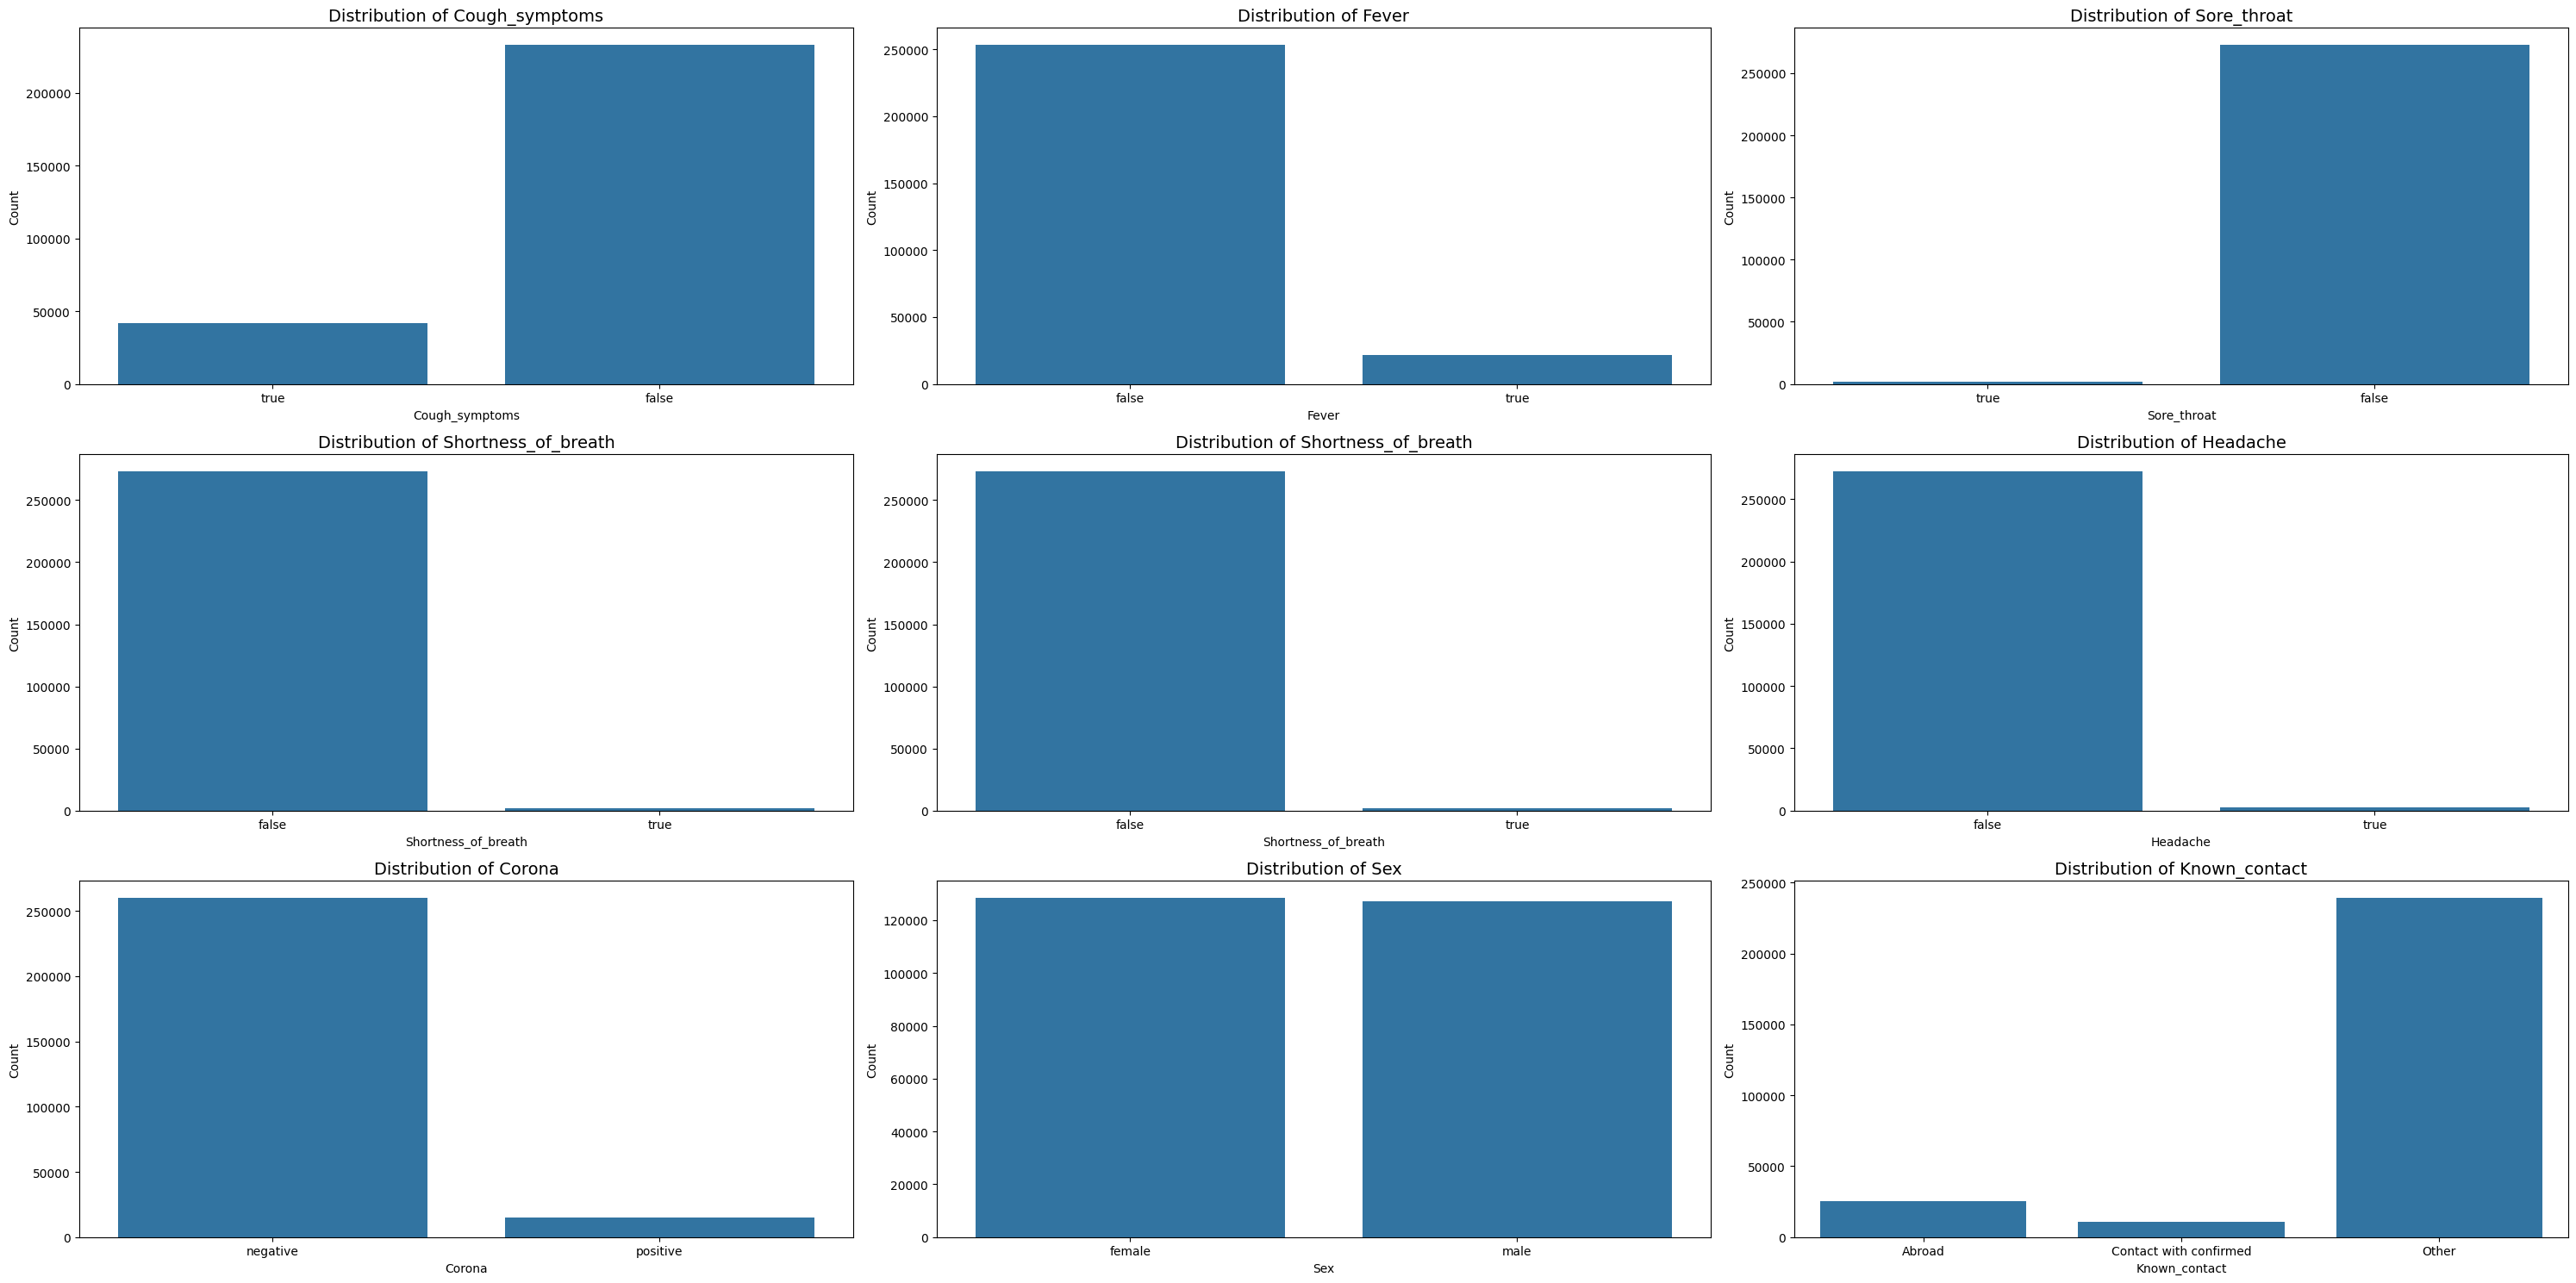

In [17]:
#Univariate Distribution Analysis

#list of columns to plot
cols = ['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath','Shortness_of_breath','Headache','Corona','Sex','Known_contact']

# Set up the figure with subplots
plt.figure(figsize=(30,15))

# Plot univariate distributions for each column
for i, col in enumerate(cols, start=1):
    plt.subplot(3,3,i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.ylabel('Count')
    plt.tick_params(axis='x')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

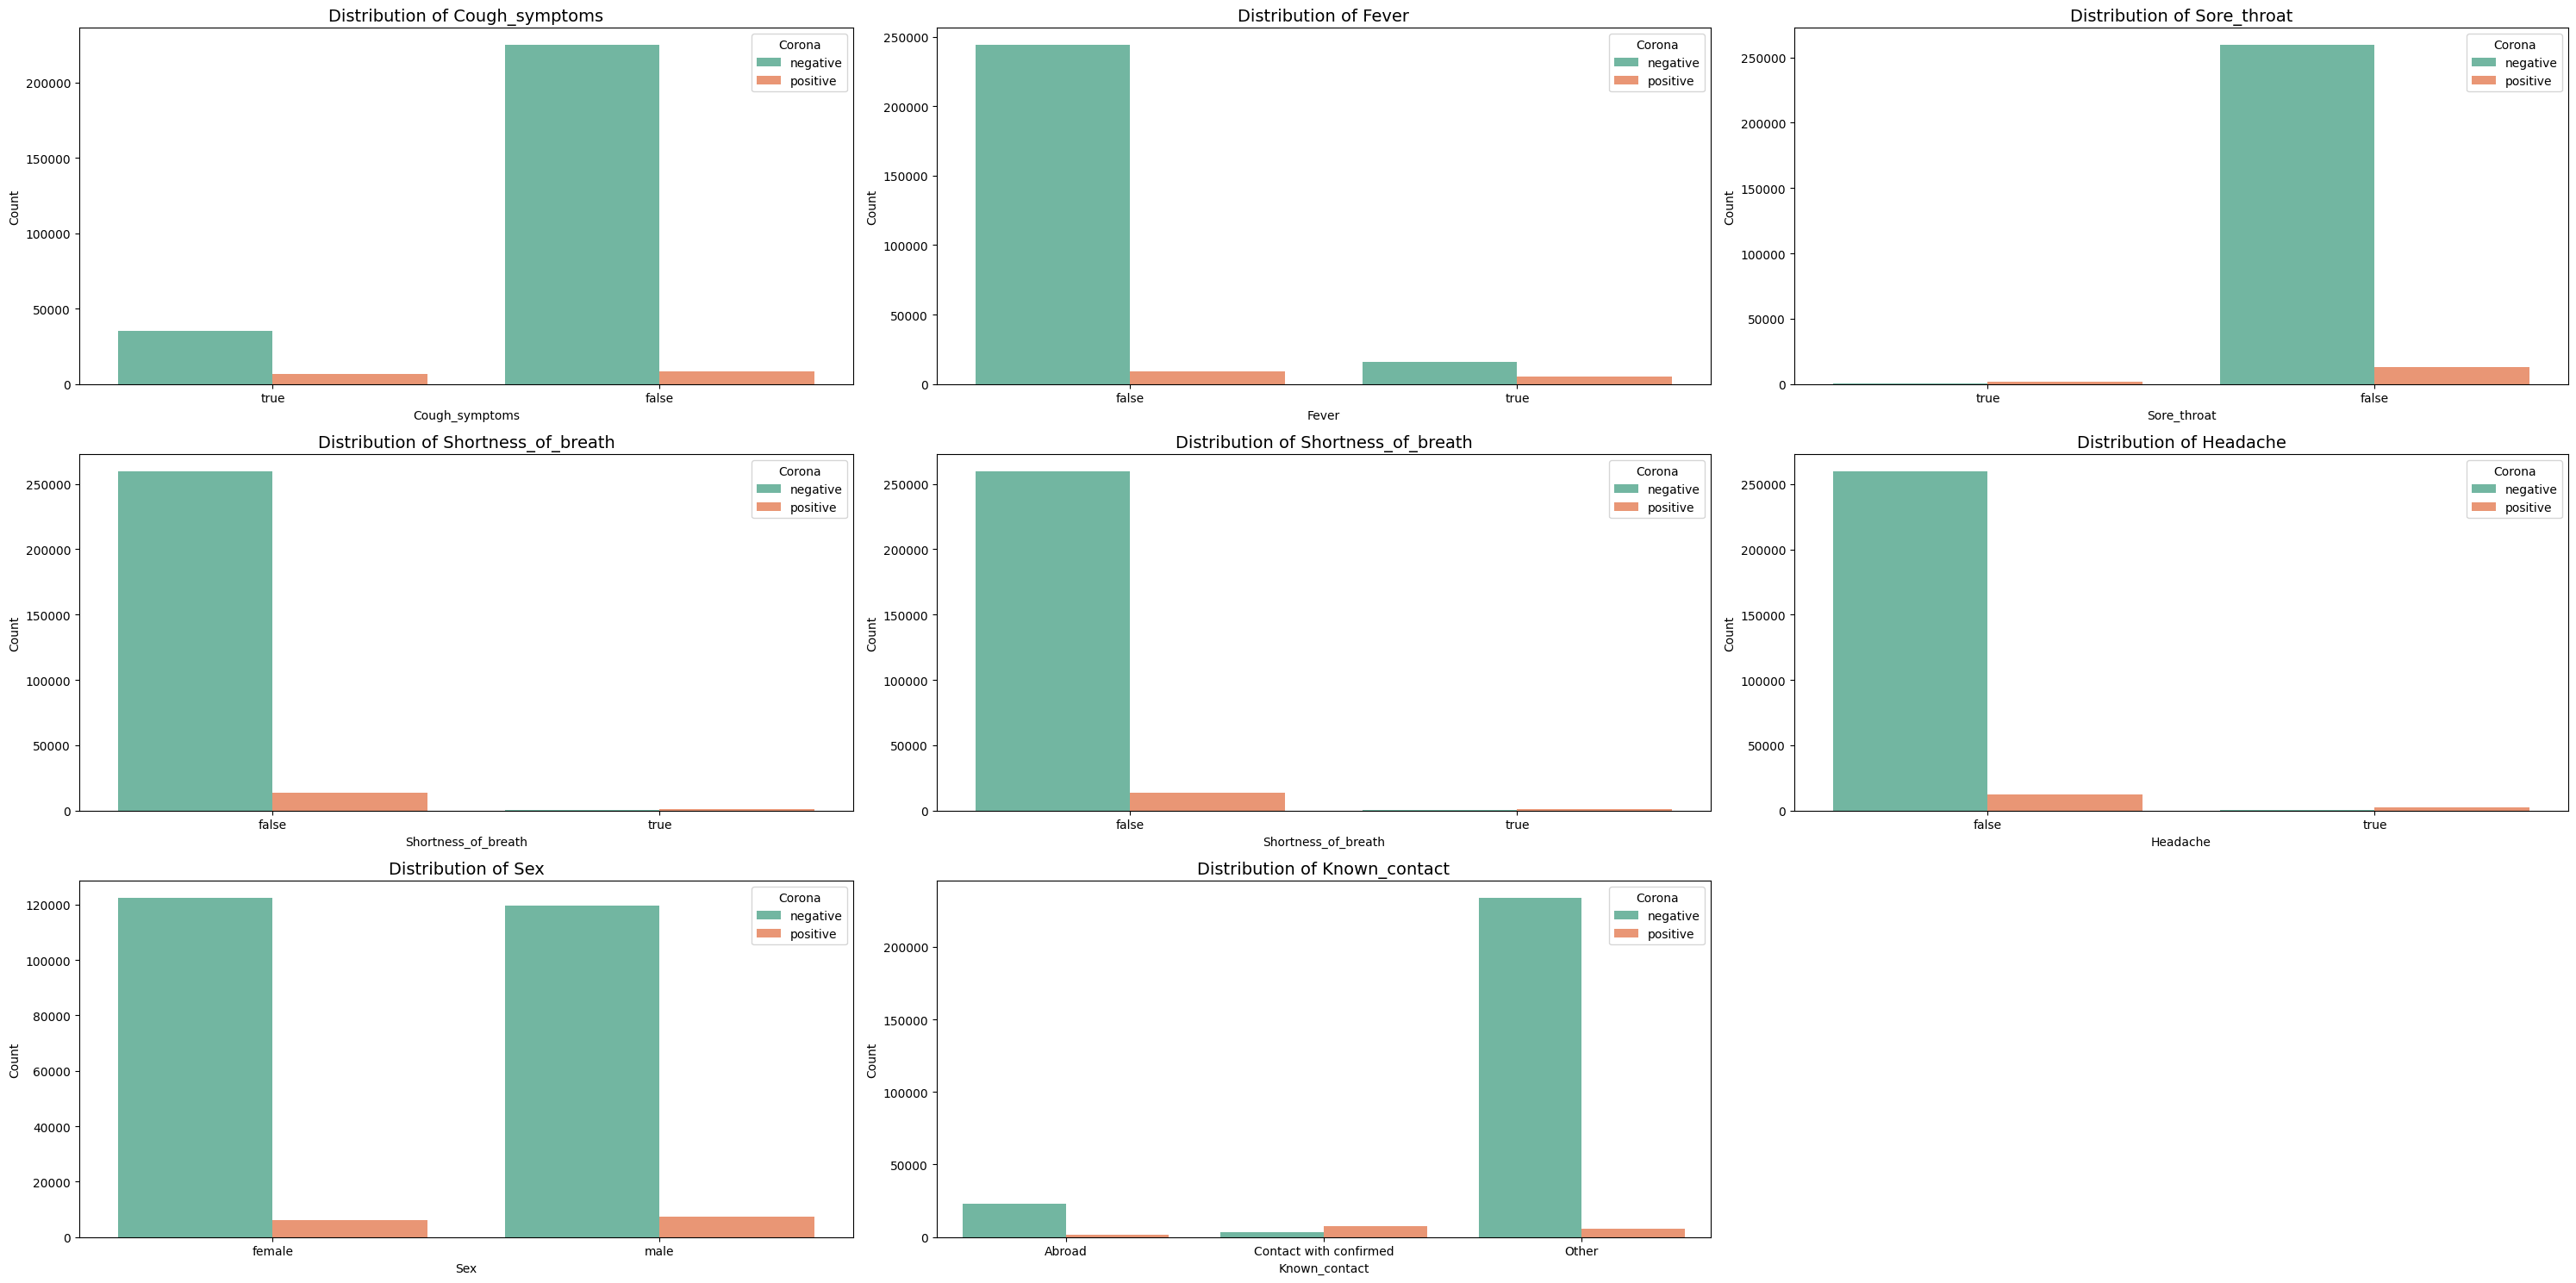

In [18]:
#Univariate Distribution Analysis

#list of columns to plot
cols = ['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath','Shortness_of_breath','Headache','Sex','Known_contact']

# Set up the figure with subplots
plt.figure(figsize=(30,15))

# Plot univariate distributions for each column
for i, col in enumerate(cols, start=1):
    plt.subplot(3,3,i)
    sns.countplot(data=df, x=col,hue='Corona',palette="Set2")
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.ylabel('Count')
    plt.tick_params(axis='x')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### **Findings 🕵**

**Cough_symptoms**: A substantial proportion of individuals who tested negative
reported no cough symptoms. However, among those with a reported cough, the number of positive cases is relatively higher.

**Fever**: The majority of individuals did not report having a fever. However, among those who did, the number of positive cases is higher than negative cases.

**Sore_throat**: The majority of individuals did not experience this symptom.

**Shortness_of_breath** : This symptom was not common among the individuals.

**Headache**: A notable number of individuals reported not having headaches.

**Age_60_above**: A considerable proportion of individuals were below 60 years of age.

**Sex**: The dataset shows an almost even distribution between females and males.

**Known_contact**: Most individuals did not have a known contact with a confirmed case.

## **Feature Engineering ♻**

In [19]:
# creating a copy of original dataframe

covid_df = df.copy(deep=True)

In [20]:
# Encoding, without any multicolinearity

covid_df['Cough_symptoms'] = pd.get_dummies(covid_df['Cough_symptoms'],drop_first=True)

covid_df['Fever'] = pd.get_dummies(covid_df['Fever'],drop_first=True)

covid_df['Sore_throat'] = pd.get_dummies(covid_df['Sore_throat'],drop_first=True)

covid_df['Shortness_of_breath'] = pd.get_dummies(covid_df['Shortness_of_breath'],drop_first=True)

covid_df['Headache'] = pd.get_dummies(covid_df['Headache'],drop_first=True)

covid_df['Corona'] = pd.get_dummies(covid_df['Corona'],drop_first=True)

covid_df['Sex'].replace({'male':0,'female':1},inplace=True)

covid_df['Known_contact'].replace({'Other':2,'Contact with confirmed':1,'Abroad':0},inplace=True)

In [21]:
covid_df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,NaN,0
1,2,11-03-2020,0,1,0,0,0,1,NaN,0
2,3,11-03-2020,0,1,0,0,0,1,NaN,0
3,4,11-03-2020,1,0,0,0,0,0,NaN,0
4,5,11-03-2020,1,0,0,0,0,0,NaN,1


In [22]:
covid_df.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Sex                    19034
Known_contact              0
dtype: int64

**IMPUTATION**

In [23]:
from sklearn.impute import KNNImputer

# creating a copy of original dataframe

imputed_data = covid_df.copy(deep=True)

In [24]:
# applying KNN imputation

knn=KNNImputer(n_neighbors=5,weights='uniform')
columns=['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath', 'Headache','Sex','Known_contact']
imputed=knn.fit_transform(covid_df[columns])

In [25]:
# putting it in data frame
df1 = pd.DataFrame(imputed,columns=columns)

In [26]:
def change(x):
    if x>0.5:
        return 1
    elif x<0.5:
        return 0
    else:
        return x

In [27]:
# inserting it into the data frame
df1['Sex'] = df1['Sex'].apply(change)

imputed_data['Sex'].iloc[:] =df1['Sex']

In [28]:
imputed_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,0,0
1,2,11-03-2020,0,1,0,0,0,1,0,0
2,3,11-03-2020,0,1,0,0,0,1,0,0
3,4,11-03-2020,1,0,0,0,0,0,0,0
4,5,11-03-2020,1,0,0,0,0,0,0,1


In [29]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  int64   
 1   Test_date            274702 non-null  object  
 2   Cough_symptoms       274702 non-null  uint8   
 3   Fever                274702 non-null  uint8   
 4   Sore_throat          274702 non-null  uint8   
 5   Shortness_of_breath  274702 non-null  uint8   
 6   Headache             274702 non-null  uint8   
 7   Corona               274702 non-null  uint8   
 8   Sex                  274702 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(2), int64(1), object(1), uint8(6)
memory usage: 8.4+ MB


In [30]:
# storing data in final df

final_data = imputed_data.astype('category')

### **Cross validation technique**

In [31]:
# separating features and target variable

features = final_data.drop(['Ind_ID','Test_date','Corona'],axis=1)

target = final_data['Corona']

In [32]:
# feature selection

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# Assuming 'features' is your feature matrix and 'target' is your target variable

# Initialize a classifier (you can use any classifier)
classifier = RandomForestClassifier(n_estimators=100)

# Initialize RFE with the classifier and the number of features to select
selector = RFE(classifier, n_features_to_select=6)

# Fit RFE and transform the features
X_new = selector.fit_transform(features, target)

# Get the indices of the selected features
idxs_selected = selector.get_support(indices=True)

# Get the names of the selected features
feat_names = features.columns[idxs_selected]

# Print or use the selected feature names
print(feat_names)


Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Known_contact'],
      dtype='object')


from this we can conclude that symptoms are important features present in the data set ,which also supports our initial hypothesis statement.

In [33]:
# spltting data to train and test as per the projects instruction (4:1)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)


In [34]:
y_test.value_counts()

0    52024
1     2917
Name: Corona, dtype: int64

# **Model training 🎯**

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, recall_score,precision_score,f1_score,roc_curve, auc, confusion_matrix


In [36]:
# Model Training
models = {
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "AdaBoost": AdaBoostClassifier(),
}

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20],
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
    },
}

best_models = {}

# RandomForest
rf_model = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_model, param_grid['RandomForest'], scoring='accuracy', cv=5, n_jobs=-1)
rf_grid_search.fit(x_train, y_train)
best_models['RandomForest'] = rf_grid_search.best_estimator_

# DecisionTree
dt_model = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(dt_model, param_grid['DecisionTree'], scoring='accuracy', cv=5, n_jobs=-1)
dt_grid_search.fit(x_train, y_train)
best_models['DecisionTree'] = dt_grid_search.best_estimator_

# SVM
svm_model = SVC()
svm_grid_search = GridSearchCV(svm_model, param_grid['SVM'], scoring='accuracy', cv=5, n_jobs=-1)
svm_grid_search.fit(x_train, y_train)
best_models['SVM'] = svm_grid_search.best_estimator_

# AdaBoost
ada_model = AdaBoostClassifier()
ada_grid_search = GridSearchCV(ada_model, param_grid['AdaBoost'], scoring='accuracy', cv=5, n_jobs=-1)
ada_grid_search.fit(x_train, y_train)
best_models['AdaBoost'] = ada_grid_search.best_estimator_

# Evaluate and compare models
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(x_test)
    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"Best Parameters: {best_model.get_params()}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Compare the best models
best_models_accuracy = {model_name: accuracy_score(y_test, model.predict(x_test)) for model_name, model in best_models.items()}
best_accuracy_model = max(best_models_accuracy, key=best_models_accuracy.get)
print(f"The best model based on accuracy is: {best_accuracy_model}")


Evaluation Metrics for RandomForest:
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy: 0.967583407655485
Precision: 0.7644320297951583
Recall: 0.5629070963318478
F1 Score: 0.6483711747285291
Confusion Matrix:
[[51518   506]
 [ 1275  1642]]



Evaluation Metrics for DecisionTree:
Best Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Accuracy: 0.9674924009391893
Precision: 0.764375876577

# **Justification:**

**Accuracy:** RandomForest (96.76%) and DecisionTree (96.75%) are very close, with RandomForest slightly ahead.

**Precision:** AdaBoost (82.27%) has the highest precision, indicating a better ability to correctly identify positive cases.

**Recall:** RandomForest (56.39%) and DecisionTree (56.05%) have similar recall, outperforming AdaBoost (29.76%).

**F1 Score:** RandomForest (64.89%) has the highest F1 score, balancing precision and recall well.

## **Conclusion:**

**RandomForest appears to be the better model overall**  offering a good balance between precision, recall, and accuracy.
DecisionTree is similar but slightly behind in terms of F1 score.
AdaBoost has high precision but significantly lower recall, indicating it might not perform as well in capturing all positive cases.

# **SQL 🔎**

In [37]:
cleaned_data=final_data

In [38]:
import duckdb

# Connect to DuckDB
conn= duckdb.connect()

conn.register("df",cleaned_data)

conn.execute("select * from df").fetchdf()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,0,0
1,2,11-03-2020,0,1,0,0,0,1,0,0
2,3,11-03-2020,0,1,0,0,0,1,0,0
3,4,11-03-2020,1,0,0,0,0,0,0,0
4,5,11-03-2020,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
274697,278844,30-04-2020,0,0,0,0,0,1,0,2
274698,278845,30-04-2020,0,0,0,0,0,0,1,2
274699,278846,30-04-2020,0,0,0,0,0,0,0,2
274700,278847,30-04-2020,0,0,0,0,0,0,0,2


In [39]:
# 1. Find the number of corona patients who faced shortness of breath
query_shortness_of_breath = """
SELECT COUNT(*) AS num_patients_shortness_of_breath
FROM df
WHERE Corona = 1 AND Shortness_of_breath = 1;
"""

# Execute the query and fetch the result
result_shortness_of_breath = conn.execute(query_shortness_of_breath).fetchdf()

# Print the result
print(result_shortness_of_breath)

   num_patients_shortness_of_breath
0                              1162


The output indicates that there were 1162 corona patients who faced shortness of breath

In [40]:
#2. Find the number of negative corona patients who have fever and sore_throat
query = """
SELECT COUNT(*) AS num_negative_patients_fever_sore_throat
FROM df
WHERE Corona = 0 AND Fever = 1 AND Sore_throat = 1;
"""

# Execute the query and fetch the result
result = conn.execute(query).fetchdf()

# Print the result
print(result)


   num_negative_patients_fever_sore_throat
0                                      121


The output shows that there were 121 negative corona patients who had both fever and sore throat

In [41]:
# Group the data by month and rank the number of positive cases
query_group_and_rank = """
    SELECT SUBSTRING(Test_date, 4, 2) AS month,
           SUBSTRING(Test_date, 7, 4) AS year,
           COUNT(*) AS num_positive_cases
    FROM df
    WHERE Corona = 1
    GROUP BY month, year
    ORDER BY num_positive_cases DESC;
"""

# Execute the query and fetch the result
result_group_and_rank = conn.execute(query_group_and_rank).fetchdf()

# Print the result
print(result_group_and_rank)

  month  year  num_positive_cases
0    04  2020                8862
1    03  2020                5832


For the month of March 2020, there were 5832 positive cases.

For the month of April 2020, there were 8862 positive cases.

In [42]:
# Find the number of female negative corona patients with cough and headache
query_female_negative_cough_headache = """
SELECT COUNT(*) AS num_female_negative_patients_cough_headache
FROM df
WHERE Corona = 0 AND Sex = 'female' AND Cough_symptoms = 1 AND Headache = 1;
"""

# Execute the query and fetch the result
result_female_negative_cough_headache = conn.execute(query_female_negative_cough_headache).fetchdf()

# Print the result
print(result_female_negative_cough_headache)


   num_female_negative_patients_cough_headache
0                                            0


The number of female negative corona patients who faced cough and headache is 0.

In [43]:
# Which three symptoms were more common among COVID positive patients?
query_common_symptoms_positive = """
SELECT
    SUM(Cough_symptoms) AS num_cough,
    SUM(Fever) AS num_fever,
    SUM(Sore_throat) AS num_sore_throat
FROM df
WHERE Corona = 1;
"""

# Execute the query and fetch the result
result_common_symptoms_positive = conn.execute(query_common_symptoms_positive).fetchdf()

# Print the result
print(result_common_symptoms_positive)


   num_cough  num_fever  num_sore_throat
0     6582.0     5558.0           1523.0


The number of corona patients with cough symptoms is 6582.

The number of corona patients with fever is 5558.

The number of corona patients with sore throat is 1523.

In [44]:
# Which symptom was less common among COVID negative people?
query_less_common_symptom_negative = """
SELECT MIN(SymptomCount) AS min_symptom_count
FROM (
    SELECT
        SUM(Cough_symptoms) + SUM(Fever) + SUM(Sore_throat) + SUM(Shortness_of_breath) + SUM(Headache) AS SymptomCount
    FROM df
    WHERE Corona = 0
) AS NegativeSymptoms;
"""

# Execute the query and fetch the result
result_less_common_symptom_negative = conn.execute(query_less_common_symptom_negative).fetchdf()

# Print the result
print(result_less_common_symptom_negative)


   min_symptom_count
0            51699.0


The minimum count of symptoms across different categories (cough, fever, sore throat, etc.) is 51699.

In [45]:
query_most_common_symptoms_male_abroad = """
SELECT
    SUM(CAST(Cough_symptoms AS INT)) AS num_cough,
    SUM(CAST(Fever AS INT)) AS num_fever,
    SUM(CAST(Sore_throat AS INT)) AS num_sore_throat,
    SUM(CAST(Shortness_of_breath AS INT)) AS num_shortness_of_breath,
    SUM(CAST(Headache AS INT)) AS num_headache
FROM df
WHERE
    Corona = '1'  -- Assuming '1' indicates a positive case (adjust based on your data)
    AND Sex = 'male'
    AND Known_contact = '2';  -- Assuming '2' indicates known contact abroad
"""

# Execute the query and fetch the result
result_most_common_symptoms_male_abroad = conn.execute(query_most_common_symptoms_male_abroad).fetchdf()

# Print the result
print(result_most_common_symptoms_male_abroad)



   num_cough  num_fever  num_sore_throat  num_shortness_of_breath  \
0        NaN        NaN              NaN                      NaN   

   num_headache  
0           NaN  


In [46]:
query_most_common_symptoms_male_abroad = """
SELECT
    COALESCE(SUM(CAST(Cough_symptoms AS INT)), 0) AS num_cough,
    COALESCE(SUM(CAST(Fever AS INT)), 0) AS num_fever,
    COALESCE(SUM(CAST(Sore_throat AS INT)), 0) AS num_sore_throat,
    COALESCE(SUM(CAST(Shortness_of_breath AS INT)), 0) AS num_shortness_of_breath,
    COALESCE(SUM(CAST(Headache AS INT)), 0) AS num_headache
FROM df
WHERE
    Corona = '1'  -- Assuming '1' indicates a positive case (adjust based on your data)
    AND Sex = 'male'
    AND Known_contact = '2';  -- Assuming '2' indicates known contact abroad
"""

# Execute the query and fetch the result
result_most_common_symptoms_male_abroad = conn.execute(query_most_common_symptoms_male_abroad).fetchdf()

# Print the result
print(result_most_common_symptoms_male_abroad)


   num_cough  num_fever  num_sore_throat  num_shortness_of_breath  \
0        0.0        0.0              0.0                      0.0   

   num_headache  
0           0.0  


In [47]:
query_most_common_symptoms_male_abroad = """
SELECT
    COALESCE(SUM(CAST(Cough_symptoms AS INT)), 0) AS num_cough,
    COALESCE(SUM(CAST(Fever AS INT)), 0) AS num_fever,
    COALESCE(SUM(CAST(Sore_throat AS INT)), 0) AS num_sore_throat,
    COALESCE(SUM(CAST(Shortness_of_breath AS INT)), 0) AS num_shortness_of_breath,
    COALESCE(SUM(CAST(Headache AS INT)), 0) AS num_headache
FROM df
WHERE
    Corona = '1'  -- Assuming '1' indicates a positive case (adjust based on your data)
    AND Sex = 'male'
    AND Known_contact = '2';  -- Assuming '2' indicates known contact abroad
"""

# Execute the corrected query and fetch the result
result_most_common_symptoms_male_abroad = conn.execute(query_most_common_symptoms_male_abroad).fetchdf()

# Print the result
print(result_most_common_symptoms_male_abroad)


   num_cough  num_fever  num_sore_throat  num_shortness_of_breath  \
0        0.0        0.0              0.0                      0.0   

   num_headache  
0           0.0  


 It shows that there are 0 cases of cough, fever, sore throat, shortness of breath, and headache among male individuals with known contact abroad who tested positive for COVID-19.

# **conclusion 🔚**


In this **COVID-19** prediction project proposal, we conducted a thorough analysis of the data using both Data Analysis (DA) and Machine Learning (ML) techniques. Through this process, we derived insights from the data. Our findings lead us to accept the **null hypothesis**, indicating a significant correlation between the symptoms and COVID-19, as supported by Exploratory Data Analysis (EDA). Additionally, the **RandomForest model** emerged as the superior choice, demonstrating a well-rounded performance with a favorable balance between precision, recall, and accuracy.